In [1]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

In [2]:
N = 100000

In [3]:
fs, tom_puro = wavfile.read('Tom-puro.wav')

tom_puro = tom_puro[:N][:,0] # Limitando o número de amostras # Selecionando apenas um canal de áudio

ipd.Audio(tom_puro,rate=fs)

In [4]:
fs, distorcido = wavfile.read('Distorcido.wav')

distorcido = distorcido[:N][:,0] # Limitando o número de amostras # Selecionando apenas um canal de áudio

ipd.Audio(distorcido, rate=fs)

In [5]:
fs = 1200
length = 1
t = np.arange(0, length, 1 / fs) 
fm = 60 # frequência fundamental do sinal
N = int(fs/fm) # um período
senoide = np.sin(2 * np.pi * t * fm)

In [6]:
senoide_fft = np.abs(np.fft.fft(senoide))

In [7]:
square_half_block = np.append(np.ones(int(fs / (2 * fm))), np.zeros(int(fs / (2 * fm))))
square_half = np.tile(square_half_block, int(length * fm))

In [8]:
square_half_fft = np.abs(np.fft.fft(square_half))

In [9]:
ret_half = square_half * senoide
ret_half_fft = np.abs(np.fft.fft(ret_half))

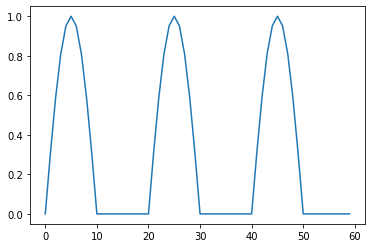

In [10]:
plt.plot(ret_half[:3*N])

In [43]:
def espectro_anotado(fft, ax, thr=.1):
    ticks = []
    for i, j in enumerate(fft[:fft.size//2]):
        if j > thr:
            ax.annotate(f'{round(j)}', (i - 10, j + 5))
            ticks.append(i)
    ax.set_xticks(ticks)
    ax.plot(fft[:fft.size//2])

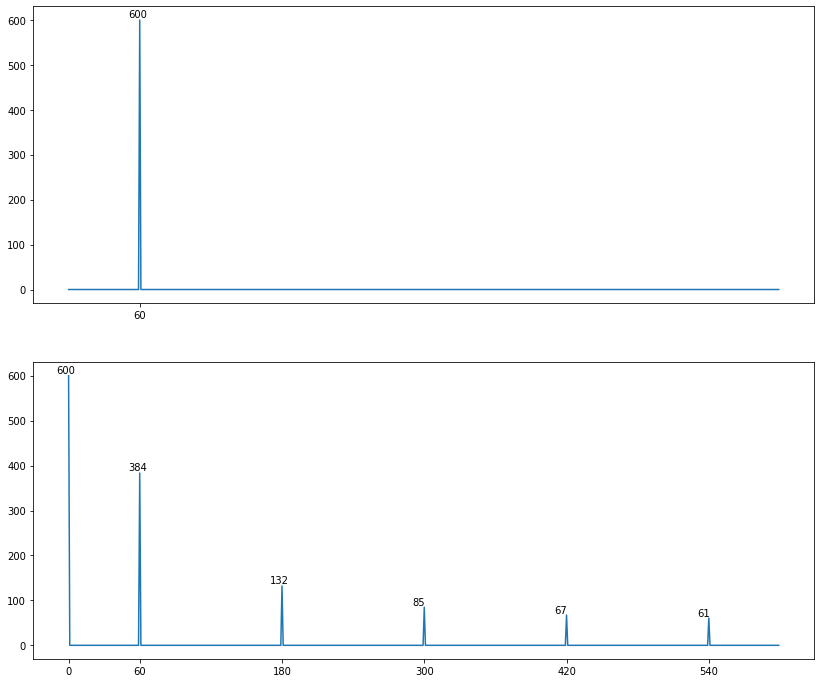

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(14, 12))
espectro_anotado(senoide_fft, axs[0])
espectro_anotado(square_half_fft, axs[1])
plt.show()

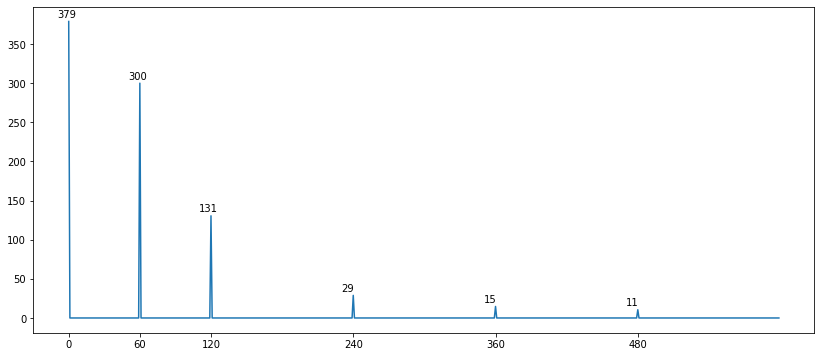

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
espectro_anotado(ret_half_fft, ax)
plt.show()

In [14]:
square_full_block = np.append(np.ones(int(fs / (2 * fm))), -np.ones(int(fs / (2 * fm))))
square_full = np.tile(square_full_block, int(length * fm))

In [15]:
square_full_fft = np.abs(np.fft.fft(square_full))

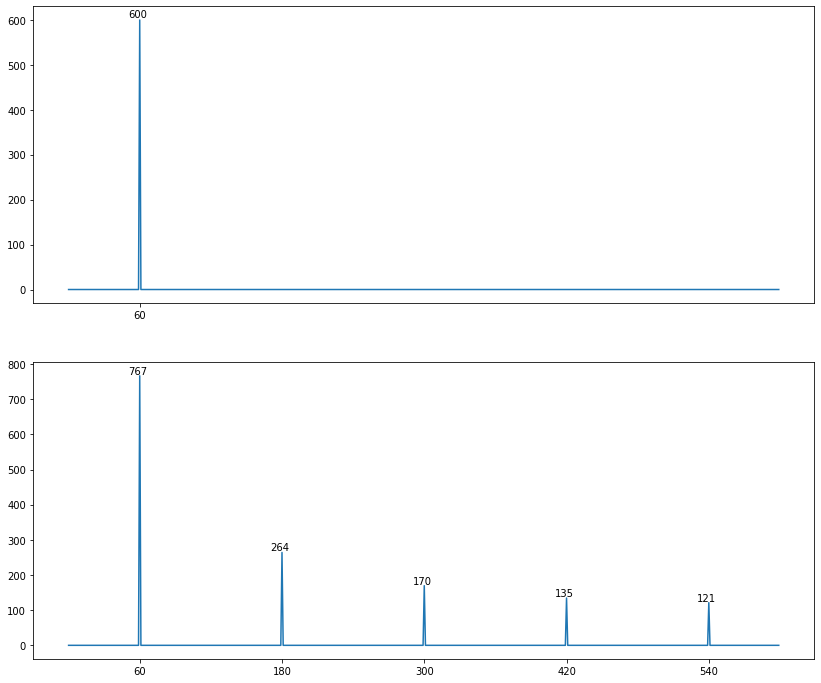

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(14, 12))
espectro_anotado(senoide_fft, axs[0])
espectro_anotado(square_full_fft, axs[1])
plt.show()

In [17]:
ret_full = np.multiply(senoide, square_full)
ret_full_fft = np.abs(np.fft.fft(ret_full))

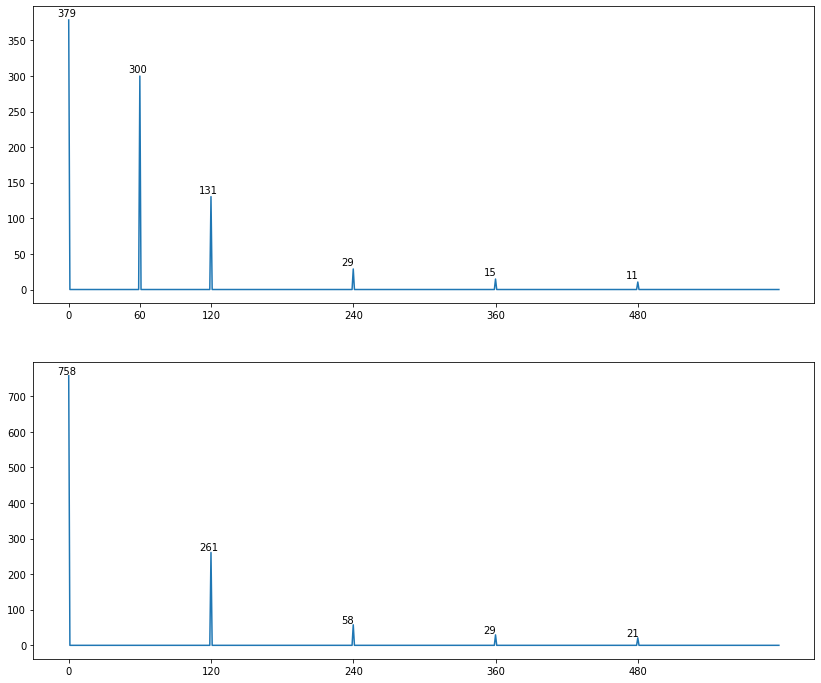

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(14, 12))
espectro_anotado(ret_half_fft, axs[0])
espectro_anotado(ret_full_fft, axs[1])
plt.show()

In [19]:
square_tir_block = np.append(np.zeros(int(fs / (4 * fm))), np.ones(int(fs / (4 * fm))))
square_tir_block = np.append(square_tir_block, -square_tir_block)
square_tir = np.tile(square_tir_block, int(length * fm))
square_tir_fft = np.abs(np.fft.fft(square_tir))

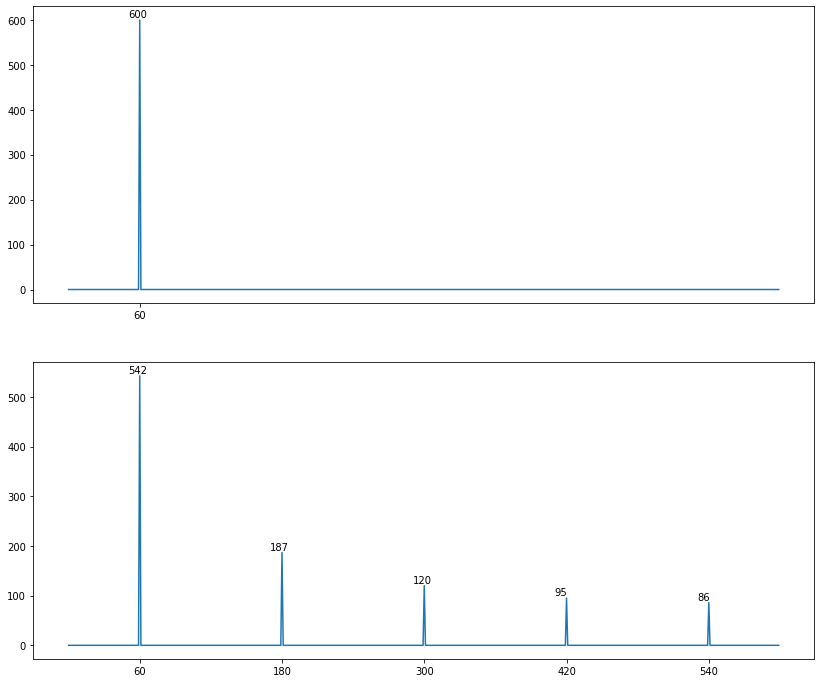

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(14, 12))
espectro_anotado(senoide_fft, axs[0])
espectro_anotado(square_tir_fft, axs[1])
plt.show()

In [21]:
ret_tir = np.multiply(senoide, square_tir)
ret_tir_fft = np.abs(np.fft.fft(ret_tir))

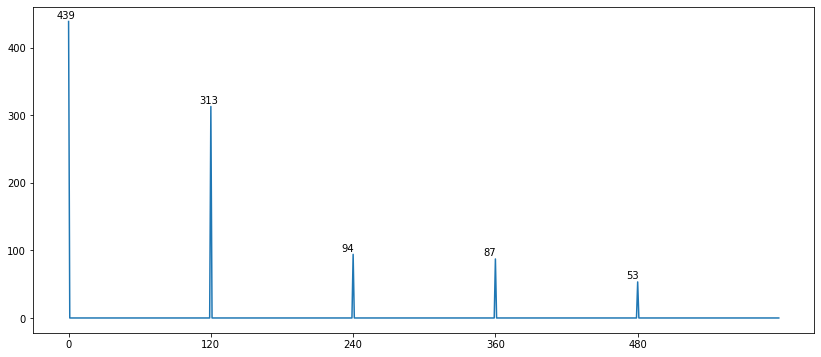

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
espectro_anotado(ret_tir_fft, ax)
plt.show()

In [48]:
sos = signal.butter(8, [30, 90], 'bandpass', fs = fs, output = 'sos')
ret_half_filtered = signal.sosfilt(sos, ret_half)
ret_half_filtered_fft = np.abs(np.fft.fft(ret_half_filtered))

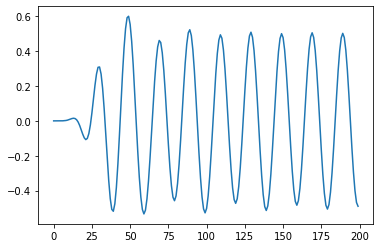

In [49]:
plt.plot(ret_half_filtered[:10*N])

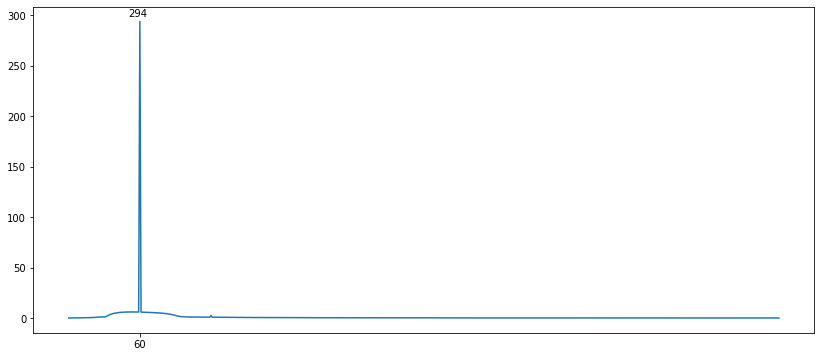

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
espectro_anotado(ret_half_filtered_fft, ax, thr=10)
plt.show()

In [24]:
# isso aqui foi so pra conferir se o resultado da primeira questao batia
# bate, mas é preciso fazer uma convolução periódica e eu não achei nenhum método muito direto
# essa conta aqui foi mais empirismo que qualquer coisa, mas parece que bateu pelo menos em ordem de grandeza


# Espectro a partir da propriedade (convolucao dos espectros individuais)
conv = np.convolve(senoide_fft, square_half_fft, mode = 'full')/1200
fig, axs = plt.subplots(3, 1, figsize=(14, 12))
conv1 = conv[:1200]
conv2 = np.append(conv, [0])[1200:]
espectro_anotado(conv1, axs[0])
espectro_anotado(conv2, axs[1])

espectro = np.abs(conv1 - conv2)
espectro_anotado(espectro, axs[2])
plt.show()

NameError: name 'fft_senoide' is not defined